# 2. `TLorentzVector` 

In [34]:
import ROOT
import numpy as np
import pandas as pd

## Introduction

A very useful feature of `ROOT` is the possibility to define relativistic four-vectors. This can be done using the `TLorentzVector` class. The functions of this class allow the initialization and handling of the vector and its properties. Lets see how it works.

In [2]:
Mtau = 1.777 #GeV 

# define a TLrentzVector
vect1 = ROOT.TLorentzVector()
# fill it we the information we have (Pt,eta,phi,mass)
vect1.SetPtEtaPhiM(30,1.5,np.pi/2,Mtau)

Now that we have set the vector we can compute the stuff we might need. For example we could need the mass x, y, z projections of the momentum of the particle, or its energy:

In [3]:
print('P =', vect1.P(), '; Px =', vect1.Px(), '; Py =', vect1.Py(), '; Pz =', vect1.Pz())
print('E =', vect1.E())

P = 70.57228845729742 ; Px = 1.83697019872103e-15 ; Py = 30.0 ; Pz = 63.87838365284452
E = 70.59465721355967


Now suppose we want to reconstruct a particle decaying in two $\tau$ leptons. Then we would have a second vector for the second $\tau$ lepton:

In [33]:
vect2 = ROOT.TLorentzVector()
vect2.SetPtEtaPhiE(50,-1.5,-np.pi/2,70.595) #energy [GeV]

Then the two vectors of the reconstructed tau leptons should be added together to form the four-vector of the particle we are trying to reconstruct:

In [5]:
# vect contains all the information about the mother particle
vect = vect1 + vect2

Let's see what are we reconstructing:

In [6]:
print('E =', vect.E(), '; M =', vect.M())

E = 141.18965721355966 ; M = 133.1201972088643


QUESTION: Given the angular configuration of the two  𝜏  leptons that we have defined, and given the E and M of the particle they come from, what can we say about it? How was it produced?

# 2.1 W-boson invariant mass

### 2.1.1 Different Flavour leptons

In this section we use what we have leart until now to calculate the invariant mass of the Z boson. We will make the calculation for each event and then we plot it in a `ROOT histogram`.

Let's consider the Drell-Yan process, in which the two intercting quarks produce a Z boson or a photon. This particle will decay in two same flavour leptons of opposite charge, or more precisely: in the final state we observe two different flavour particles, like a muon and a positron.

In the following events the kinematic data of these two particles are reported. Some cuts have been already applied.

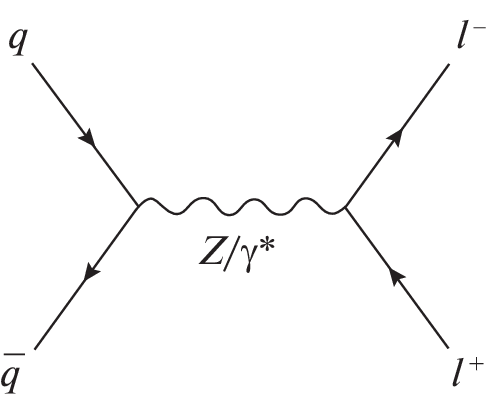

In [7]:
from IPython.display import Image
Image(filename='DY.png') 

In this exercise we want to calcuate the invariant mass of the particle which is decayed in our two different flavour particles. Let first open the following file `plots_paper_2018.root` and cosider the Drell-Yan events contained in the `dycr/VBS_OS` folder.

In [8]:
rfile = ROOT.TFile.Open('/home/llr/cms/mchiusi/TREX-PHY584/DY_different_flavor.root')
rfolder = rfile.Get("dycr/VBS_OS")
rfolder.GetListOfKeys().Print()

Collection name='THashList', class='THashList', size=5
 TKey Name = tree_DATA, Title = tree_DATA, Cycle = 1
 TKey Name = tree_DY, Title = tree_DY, Cycle = 1
 TKey Name = tree_WW, Title = tree_WW, Cycle = 1
 TKey Name = tree_WWewk, Title = tree_WWewk, Cycle = 1
 TKey Name = tree_top, Title = tree_top, Cycle = 1


In [9]:
tree = rfolder.Get('tree_DY')
tree.Print()

******************************************************************************
*Tree    :tree_DY   : tree_DY                                                *
*Entries :    73196 : Total =        12380432 bytes  File  Size =    5885735 *
*        :          : Tree compression factor =   2.10                       *
******************************************************************************
*Br    0 :weight    : weight/D                                               *
*Entries :    73196 : Total  Size=     589533 bytes  File Size  =     400337 *
*Baskets :       38 : Basket Size=      32000 bytes  Compression=   1.47     *
*............................................................................*
*Br    1 :PuppiMET_pt : PuppiMET_pt/D                                        *
*Entries :    73196 : Total  Size=     589743 bytes  File Size  =     324645 *
*Baskets :       38 : Basket Size=      32000 bytes  Compression=   1.81     *
*...................................................

Now we start looking at the Drell-Yan events, defining some `TLorentzVector`

We can assume that the first lepton is emetted at $\phi_{l1}$ = 0 and the other one at $\phi_{l2}$ = $\Delta\phi_{ll}$: our detector is symmetric in $\phi$ angle!

In [30]:
import uproot

filename  = "/home/llr/cms/mchiusi/TREX-PHY584/DY_different_flavor.root"
name_tree = "dycr/VBS_OS/tree_DY"
branches  = ['pt_1l','eta_1l','pt_2l','eta_2l','dphill']

tree_dycr = uproot.open(filename)[name_tree] # tree definition
dycr_df   = tree_dycr.arrays(branches, library='pd') # dataframe (df) definition

dycr_df.head()

,pt_1l,eta_1l,pt_2l,eta_2l,dphill
0,79.034126,0.991089,34.371510,-0.460876,3.112396
1,43.201500,0.028946,14.399381,-0.559448,2.684552
2,83.379280,1.703125,16.678337,0.793823,1.076904
3,50.626842,1.446533,27.192501,2.163086,2.151833
4,36.009739,0.050102,28.557533,1.376221,1.144653


In [31]:
vect_l1 = ROOT.TLorentzVector()
vect_l2 = ROOT.TLorentzVector()
vect    = ROOT.TLorentzVector()

mass_df = []

for event_number in dycr_df.index:
    event = dycr_df.loc[event_number]
    
    #defining the 4-vector (lepton mass = 0)
    vect_l1.SetPtEtaPhiM(event.pt_1l, event.eta_1l, 0, 0)
    vect_l2.SetPtEtaPhiM(event.pt_2l, event.eta_2l, event.dphill, 0)
    
    vect = vect_l1 + vect_l2
    mass_df.append(vect.M())

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


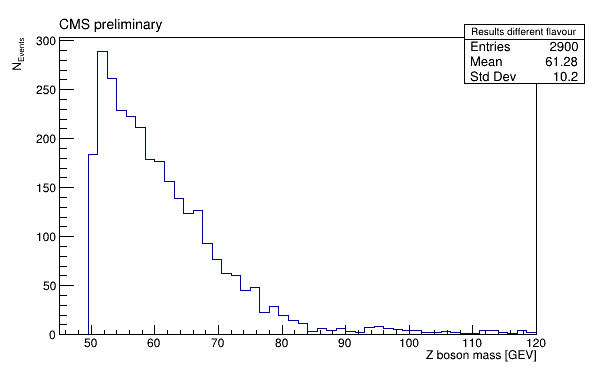

In [32]:
# Create a canvas
c = ROOT.TCanvas('c', 'Z boson mass - DF sample', 600, 400)

# Create a histogram and draw it
h1 = ROOT.TH1F('Results different flavour', ';Z boson mass [GEV]; N_{Events}', 50, 45, 120)
for mass_value in mass_df:
        h1.Fill(mass_value)
h1.Draw()

label = ROOT.TLatex()
label.SetNDC(True)
label.SetTextSize(0.040)
label.DrawLatex(0.10, 0.92, '#bf{CMS preliminary}')
# show interactively
c.Draw()

Why don't we see any peak in this case?
Try to understand how the Drell-Yan process works and why is consider a background for the VBS process.

Hint: the two leptons emetted from the Z decay have to be of the same flavour, but..

# 2.2 To do

### 2.2.1 Same Flavour leptons

What happens if we consider the so-called same flavour (SF) sample?
Let's re-do the calculation shortly:

In [24]:
import uproot

file  = uproot.open("/home/llr/cms/mchiusi/TREX-PHY584/DY_same_flavor.root")
branches  = ['pt_1l','eta_1l','pt_2l','eta_2l','dphill']

df_list = []
for name_tree in file.keys(filter_name = "*hardJets*"):
    print("Opening TTree: " + name_tree)
    tree_sf   = file[name_tree] # tree definition
    temp_df   = tree_sf.arrays(branches, library='pd') # dataframe (df) definition
    df_list.append(temp_df) # list of dataframes 

dycr_sf = pd.DataFrame()    
dycr_sf = pd.concat(df_list, ignore_index=True) # merged dataframe

Opening TTree: DY_2j_ee_highDetajj/VBS_OS/tree_DY_hardJets;1
Opening TTree: DY_2j_mm_highDetajj/VBS_OS/tree_DY_hardJets;1
Opening TTree: DY_2j_ee_lowDetajj/VBS_OS/tree_DY_hardJets;1
Opening TTree: DY_2j_mm_lowDetajj/VBS_OS/tree_DY_hardJets;1


In [26]:
dycr_sf.head()

,pt_1l,eta_1l,pt_2l,eta_2l,dphill
0,73.086128,0.738525,23.847759,-0.103638,2.560303
1,110.381660,-1.094727,57.090324,-2.083984,0.446045
2,57.288181,-2.015625,44.539574,-1.795410,2.169983
3,192.232407,0.583130,47.670444,0.344238,0.988263
4,69.793480,0.347900,26.775560,1.298584,2.272888


In [27]:
vect_l1 = ROOT.TLorentzVector()
vect_l2 = ROOT.TLorentzVector()

mass_sf = []

for event_number in dycr_sf.index:
    event = dycr_sf.loc[event_number]
    vect_l1.SetPtEtaPhiM(event.pt_1l, event.eta_1l, 0, 2)
    vect_l2.SetPtEtaPhiM(event.pt_2l, event.eta_2l, event.dphill, 2)
    
    mass_sf.append((vect_l1 + vect_l2).M())

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


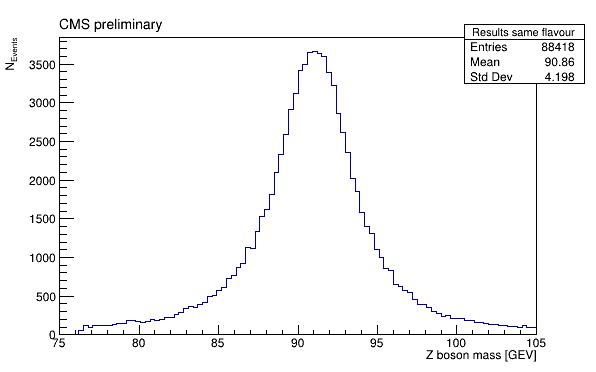

In [28]:
# Create a canvas
c1 = ROOT.TCanvas('c', 'Z boson mass - SF sample', 600, 400)

# Create a histogram and draw it
h1 = ROOT.TH1F('Results same flavour', ';Z boson mass [GEV]; N_{Events}', 100, 75, 105)
for mass_value in mass_sf:
        h1.Fill(mass_value)
h1.Draw()

label = ROOT.TLatex()
label.SetNDC(True)
label.SetTextSize(0.040)
label.DrawLatex(0.10, 0.92, '#bf{CMS preliminary}')
# show interactively
c1.Draw()

### 2.2.2 Fit the histogram

What does this peak represents?
Fit the distribution with a proper fit function.

NB: show the accordance between data and model using statistical methods (chi-square for example)

### 2.2.3 Sample H in tau tau

Higgs reconstruction

### 2.2.4 Transverse Mass Plot --> deleting

When searching for signal processes with multiple undetected particles in the final state, the missing momentum is the most important quantity needed to separate the signal from the background. 
The central idea is to consider both the magnitude and direction of the missing momentum and, in particular, to not inadvertently lose information.

In [ ]:
import uproot

file  = uproot.open("/home/llr/cms/mchiusi/TREX-PHY584/plots_paper_2018_complete_htt.root")
branches  = ['pt_1l','eta_1l','pt_2l','eta_2l','dphill','PuppiMET_pt','PuppiMET_phi']

df_list = []
for name_tree in file.keys(filter_name = "*sr*htt*"):
    print("Opening TTree: " + name_tree)
    tree_sf   = file[name_tree] # tree definition
    temp_df   = tree_sf.arrays(library='pd') # dataframe (df) definition
    df_list.append(temp_df) # list of dataframes 

htt_df = pd.DataFrame()    
htt_df = pd.concat(df_list, ignore_index=True) # merged dataframe

In [ ]:
import ROOT.Math as math

mass_t = []

for event_number in dycr_sf.index:
    event = htt_df.loc[event_number]
    vect_ll  = math.Polar2DVector(event.ptll, event.dphill)
    vect_met = math.Polar2DVector(event.PuppiMET_pt, event.PuppiMET_phi)
    
    mWW = np.sqrt(np.power(event.ptll+event.PuppiMET_pt,2)-((vect_ll+vect_met).Mag2()))
    mass_t.append(mWW)

In [ ]:
# Create a canvas
c2 = ROOT.TCanvas('c', 'Z boson mass - SF sample', 600, 400)

# Create a histogram and draw it
h2 = ROOT.TH1F('Results', ';Z boson mass [GEV]; N_{Events}', 50, 0, 300)
for mass_value in mass_t:
        h2.Fill(mass_value)
h2.Draw()

label = ROOT.TLatex()
label.SetNDC(True)
label.SetTextSize(0.040)
label.DrawLatex(0.10, 0.92, '#bf{CMS preliminary}')
# show interactively
c2.Draw()